In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import os

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ASL_models/demo_for CNN.csv")
df

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z73,v73,x74,y74,z74,v74,x75,y75,z75,v75
0,coffee,0.490560,0.290803,-0.457349,0.999989,0.507861,0.251743,-0.412709,0.999987,0.516950,...,-0.039968,0.0,0.496138,0.838479,-0.032200,0.0,0.510814,0.841485,-0.026400,0.0
1,coffee,0.490317,0.296208,-0.467214,0.999987,0.507768,0.253555,-0.425430,0.999984,0.516758,...,-0.032240,0.0,0.499593,0.842492,-0.023976,0.0,0.513295,0.845279,-0.018187,0.0
2,coffee,0.490271,0.300322,-0.470750,0.999986,0.507730,0.255209,-0.429952,0.999982,0.516656,...,-0.032046,0.0,0.501178,0.847488,-0.023551,0.0,0.515599,0.849821,-0.017611,0.0
3,coffee,0.490268,0.302454,-0.487628,0.999985,0.507728,0.256161,-0.446110,0.999981,0.516634,...,-0.032033,0.0,0.500290,0.853992,-0.023843,0.0,0.514286,0.856211,-0.018308,0.0
4,coffee,0.490803,0.303688,-0.505418,0.999985,0.507995,0.256749,-0.462483,0.999980,0.516718,...,-0.031262,0.0,0.500826,0.858976,-0.022877,0.0,0.514729,0.861247,-0.017345,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,coffee,0.496863,0.302861,-0.649061,0.999965,0.513863,0.255302,-0.599471,0.999905,0.523044,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
111,coffee,0.496631,0.301382,-0.643764,0.999955,0.513532,0.254744,-0.594247,0.999894,0.522931,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
112,coffee,0.496510,0.300023,-0.687388,0.999919,0.513147,0.254390,-0.633070,0.999848,0.522765,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
113,coffee,0.496565,0.299678,-0.744448,0.999876,0.513067,0.254359,-0.690254,0.999778,0.522710,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0


In [ ]:
df.value_counts("x74")

x74
0.000000    8
0.467091    1
0.468908    1
0.468607    1
0.468328    1
           ..
0.460880    1
0.460635    1
0.460415    1
0.460104    1
0.501178    1
Length: 108, dtype: int64

In [ ]:
df.to_numpy().shape

(115, 301)

In [ ]:
df = df.drop(columns="class")

In [ ]:
all_frames = df.to_numpy().reshape((len(df), 75, 4))
all_frames.shape

(115, 75, 4)

In [ ]:
def visualize_random(video):
  ind = random.randint(0, len(video))
  plt.scatter(video[ind][:, 0], video[ind][:, 1])

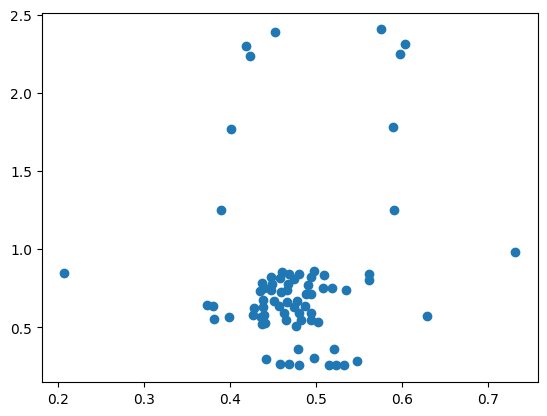

In [ ]:
visualize_random(all_frames)

##Prepare data

In [11]:
labels_dict = {
    "coffee":0,
   "dog": 1,
    "door":2,
     "milk":3,
}

In [9]:
#don't run on colab
labels_dict = {}
for i, dir in enumerate(os.listdir("/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/training_models/mediapipe/reformatting-the-data/data_four_labels")):
    if dir !=  '.DS_Store':
        labels_dict[dir] = i
labels_dict

{'dog': 1, 'milk': 2, 'coffee': 3, 'door': 4}

In [31]:
def create_data(video, label, labels_dict, window_size=10): #video format: (#frames, 75, 4)
  labels = []
  data = []
  for i in range(len(video)-window_size):
    data.append(video[i: i+window_size])
    labels.append([labels_dict[label]])

  return np.array(data), labels

In [37]:
WINDOW_SIZE = 20

data, labels = create_data(all_frames, "coffee", labels_dict, WINDOW_SIZE)
data.shape

(34, 20, 75, 4)

In [40]:
import random
path = "/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/data_augmentation/data_four_labels_augmentation"
X = []
y = []

for folder in os.listdir(path):
    if folder != ".DS_Store":
        files = os.listdir(os.path.join(path, folder))
        i = 0
        random.shuffle(files)
        for file in files:
            if i < 10: # number of files that we want our model to learn
                if file != ".DS_Store":
                    df = pd.read_csv(os.path.join(path, folder, file))
                    label = df["class"]
                    df = df.drop("class", axis=1)
                    all_frames = df.to_numpy().reshape((len(df), 75, 4))
                    data, labels = create_data(all_frames, folder, labels_dict, WINDOW_SIZE)
                    for frame in data:
                        X.append(frame)
                    y.append(labels)
                    print(data.shape)
                    print("DONE")
                i += 1
            else:
                break
                

(68, 20, 75, 4)
DONE
(61, 20, 75, 4)
DONE
(129, 20, 75, 4)
DONE
(41, 20, 75, 4)
DONE
(52, 20, 75, 4)
DONE
(26, 20, 75, 4)
DONE
(100, 20, 75, 4)
DONE
(50, 20, 75, 4)
DONE
(51, 20, 75, 4)
DONE
(100, 20, 75, 4)
DONE
(45, 20, 75, 4)
DONE
(70, 20, 75, 4)
DONE
(91, 20, 75, 4)
DONE
(48, 20, 75, 4)
DONE
(31, 20, 75, 4)
DONE
(91, 20, 75, 4)
DONE
(43, 20, 75, 4)
DONE
(111, 20, 75, 4)
DONE
(54, 20, 75, 4)
DONE
(91, 20, 75, 4)
DONE
(72, 20, 75, 4)
DONE
(51, 20, 75, 4)
DONE
(43, 20, 75, 4)
DONE
(95, 20, 75, 4)
DONE
(51, 20, 75, 4)
DONE
(112, 20, 75, 4)
DONE
(92, 20, 75, 4)
DONE
(51, 20, 75, 4)
DONE
(43, 20, 75, 4)
DONE
(54, 20, 75, 4)
DONE
(55, 20, 75, 4)
DONE
(53, 20, 75, 4)
DONE
(129, 20, 75, 4)
DONE
(32, 20, 75, 4)
DONE
(34, 20, 75, 4)
DONE
(34, 20, 75, 4)
DONE
(129, 20, 75, 4)
DONE
(53, 20, 75, 4)
DONE
(36, 20, 75, 4)
DONE
(106, 20, 75, 4)
DONE


In [42]:
X = np.array(X)
X.shape

(2678, 20, 75, 4)

##CNN model

In [ ]:

model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=4,
                           activation="relu",
                           input_shape=(WINDOW_SIZE, 75,4),
                           padding="valid"),

    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
                               
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
                               
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation="sigmoid")
])

model_1.compile(loss="sparse_categorical_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

In [ ]:
model_1.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_68 (Conv2D)          (None, 17, 72, 10)        650       
                                                                 
 conv2d_69 (Conv2D)          (None, 15, 70, 10)        910       
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 7, 35, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_70 (Conv2D)          (None, 5, 33, 10)         910       
                                                                 
 conv2d_71 (Conv2D)          (None, 3, 31, 10)         910       
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 1, 15, 10)        0         
 g2D)                                                

In [ ]:
history_1 = model_1.fit(data, np.array(labels), epochs=10)

Epoch 1/10
3/3 [==============================] - 13s 131ms/step - loss: 1.4483 - accuracy: 0.0000e+00
Epoch 2/10
3/3 [==============================] - 0s 6ms/step - loss: 1.1092 - accuracy: 0.6632
Epoch 3/10
3/3 [==============================] - 0s 6ms/step - loss: 0.8599 - accuracy: 1.0000
Epoch 4/10
3/3 [==============================] - 0s 6ms/step - loss: 0.5910 - accuracy: 1.0000
Epoch 5/10
3/3 [==============================] - 0s 6ms/step - loss: 0.3027 - accuracy: 1.0000
Epoch 6/10
3/3 [==============================] - 0s 6ms/step - loss: 0.0989 - accuracy: 1.0000
Epoch 7/10
3/3 [==============================] - 0s 9ms/step - loss: 0.0210 - accuracy: 1.0000
Epoch 8/10
3/3 [==============================] - 0s 7ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 9/10
3/3 [==============================] - 0s 6ms/step - loss: 6.9564e-04 - accuracy: 1.0000
Epoch 10/10
3/3 [==============================] - 0s 6ms/step - loss: 1.5340e-04 - accuracy: 1.0000
